In [ ]:
import pandas as pd
dt = pd.read_csv('/content/drive/MyDrive/review (1).csv')
dt

,business_id,rating,review_text
0,605730f68cd0e3d69a52284b,4,We came for a birthday brunch and this place i...
1,605730f68cd0e3d69a52284b,5,"Cool place to hang out, have drinks. There is..."
2,605730f68cd0e3d69a52284b,2,This place doesn’t rock the senses when it com...
3,605730f68cd0e3d69a52284b,3,Pretty cool place to hang out with friends and...
4,605730f68cd0e3d69a52284b,5,We saw this place the other day when we had re...
...,...,...,...
1487742,60401a5466e8bd764351f091,5,Ordered the Chicken Tikka Masala and Chicken K...
1487743,60401a5466e8bd764351f091,5,Great shrimp tikka masala. A little too much r...
1487744,60401a5466e8bd764351f091,4,"Good food, great portions. The chicken I order..."
1487745,60401a5466e8bd764351f091,4,Amazing is really good you guys should try it ...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 新段落

In [ ]:
df_dataset = dt[['review_text','rating']]
df_dataset.columns = ['review_text','rating']
df_dataset.head()

,review_text,rating
0,We came for a birthday brunch and this place i...,4
1,"Cool place to hang out, have drinks. There is...",5
2,This place doesn’t rock the senses when it com...,2
3,Pretty cool place to hang out with friends and...,3
4,We saw this place the other day when we had re...,5


In [ ]:
import numpy as np
dt['sentence_length'] = dt['review_text'].apply(lambda x: len(x.split()))

average_length = dt.groupby('rating')['sentence_length'].mean()
average_length

rating
1    75.833609
2    76.287642
3    59.604272
4    42.823978
5    35.228578
Name: sentence_length, dtype: float64

In [ ]:
pip install textblob

In [ ]:
pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.6/490.6 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.0 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.5-py3-none-any.whl size=16518 sha256=9cb89fa33f298c7279d40ba8ce56d2a5160b9356018ba6d41864e5e09c227ea1
  Stored in directory: /root/.cache/pip/wheels/00/7e/8c/438ea309a16ef1a9130849060f962e0d2c4e94b8a4314d5919
Successfully built swifter


In [ ]:
import pandas as pd
from textblob import TextBlob
import swifter
from tqdm import tqdm
from sklearn.metrics import classification_report

limited_dt = dt.head(50000)
# 创建一个函数来计算情感得分
def calculate_sentiment_score(text):
    return TextBlob(text).sentiment.polarity

# 创建一个新的列来存储情感得分
limited_dt['sentiment_score'] = limited_dt['review_text'].swifter.apply(calculate_sentiment_score)


Pandas Apply:   0%|          | 0/50000 [00:00<?, ?it/s]

<ipython-input-5-9c7beb5a3c9b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  limited_dt['sentiment_score'] = limited_dt['review_text'].swifter.apply(calculate_sentiment_score)


In [ ]:
limited_dt['sentiment_score']

0        0.271875
1        0.419697
2        0.408889
3        0.149953
4        0.344500
           ...   
49995    0.522000
49996    0.262500
49997    1.000000
49998    0.468750
49999    0.137500
Name: sentiment_score, Length: 50000, dtype: float64

In [ ]:
dt.dropna(inplace=True)
label_dict = {1: 0, 2: 0, 3: 1, 4: 2, 5: 2}
labels = dt['rating'].tolist()
labels_ = [label_dict[i] for i in labels]


In [ ]:
def calculate_sentiment_score(text):
    return TextBlob(text).sentiment.polarity


In [ ]:
dt['sentiment_score'] = dt['review_text'].swifter.apply(calculate_sentiment_score)


Pandas Apply:   0%|          | 0/1487747 [00:00<?, ?it/s]

In [ ]:
labels_pre = []
for score in tqdm(dt['sentiment_score'].tolist()):
    if score < 0:
        labels_pre.append(0)  # 负面
    elif score == 0:
        labels_pre.append(1)  # 中性
    else:
        labels_pre.append(2)  # 赞扬


100%|██████████| 1487747/1487747 [00:01<00:00, 1275157.69it/s]


In [ ]:
target_names = ['负面','中性','赞扬']
print(classification_report(labels_, labels_pre, target_names=target_names, digits=3))


              precision    recall  f1-score   support

          负面      0.568     0.495     0.529     96654
          中性      0.060     0.022     0.032     88533
          赞扬      0.913     0.961     0.937   1302560

    accuracy                          0.875   1487747
   macro avg      0.514     0.493     0.499   1487747
weighted avg      0.840     0.875     0.856   1487747



In [ ]:
neutral_sentences = []
ratings = []

for sentence, score, rating in zip(limited_dt['review_text'], limited_dt['sentiment_score'], limited_dt['rating']):
    if score == 0.0:
        neutral_sentences.append(sentence)
        ratings.append(rating)

print("情感得分为0.0的句子及其对应的评分：")
for sentence, rating in zip(neutral_sentences, ratings):
    print(f"句子：{sentence}\t评分：{rating}")


情感得分为0.0的句子及其对应的评分：
句子：Went for dinner with family around 6 pm. on Saturday...no wait period...Awesome Atmosphere...Great Food ....Excellent Server and service...	评分：5
句子：Tacos are fire, but don't do ground beef. Asada and pollo all day bro...	评分：5
句子：Found a spot at the bar and got it in. Everything was delsih.	评分：5
句子：This place never disappoints, it’s now religion whenever I visit Orlando.	评分：5
句子：Closest thing to eating a bagel with lox in Manhattan station. Perfection! 	评分：5
句子：Corned beef and pastrami on rye is the yummy way to go	评分：5
句子：Spot on with food and service. Leave room for desert. Had combo for 3 & it was just my wife and I. Yes, we took food home for breakfast the next day	评分：5
句子：Things I miss about Vegas!!!! The bagels that I brought back to Texas took 1/2 my space in the luggage.	评分：5
句子：OMG--the Reuben omlette!! Corned beef, sauerkraut, Russian dressing and cheese!!	评分：5
句子：Just like being in a NYC deli	评分：5
句子：Gave me a place to go to get some work done when I wa

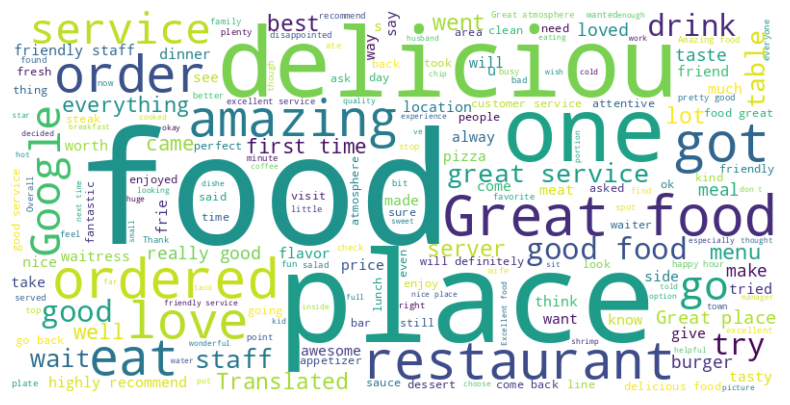

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = ' '.join(dt['review_text'].tolist())

# 创建词云对象和生成
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate(all_text)

# 获取词云图像的像素值
image = wordcloud.to_image()

# 显示词云图像
plt.figure(figsize=(10, 5))
plt.imshow(image, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.4 MB/s eta 0:00:00


In [ ]:
train_df = df_dataset[:9000]
eval_df = df_dataset[-1000:]

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

In [ ]:
import re

def preprocess_text(text):
    # 删除非英文字符和标点符号
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # 删除纯标点符号的句子
    if re.match(r"^[^\w\s]+$", text):
        return None
    return text.strip()

# 数据预处理
train_texts = train_df['review_text'].tolist()
train_labels = train_df['rating'].tolist()

eval_texts = eval_df['review_text'].tolist()
eval_labels = eval_df['rating'].tolist()

# 过滤数据
train_texts = [preprocess_text(text) for text in train_texts]
eval_texts = [preprocess_text(text) for text in eval_texts]

# 去除为空的句子
train_texts = [text for text in train_texts if text is not None]
eval_texts = [text for text in eval_texts if text is not None]

# 分词和添加特殊标记
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
eval_encodings = tokenizer(eval_texts, truncation=True, padding=True)

# 转换为模型输入张量
train_inputs = torch.tensor(train_encodings['input_ids'])
train_labels = torch.tensor(train_labels)
eval_inputs = torch.tensor(eval_encodings['input_ids'])
eval_labels = torch.tensor(eval_labels)

train_dataset = torch.utils.data.TensorDataset(train_inputs, train_labels)
eval_dataset = torch.utils.data.TensorDataset(eval_inputs, eval_labels)


In [ ]:
unique_labels = set(train_labels)
print("Unique labels in train_labels:", unique_labels)


Unique labels in train_labels: {tensor(5), tensor(1), tensor(1), tensor(5), tensor(5), tensor(4), tensor(5), tensor(2), tensor(5), tensor(4), tensor(3), tensor(5), tensor(5), tensor(5), tensor(5), tensor(4), tensor(5), tensor(4), tensor(5), tensor(4), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(4), tensor(4), tensor(5), tensor(3), tensor(5), tensor(5), tensor(4), tensor(5), tensor(5), tensor(5), tensor(4), tensor(5), tensor(5), tensor(5), tensor(5), tensor(3), tensor(5), tensor(5), tensor(5), tensor(2), tensor(4), tensor(4), tensor(5), tensor(4), tensor(5), tensor(5), tensor(4), tensor(5), tensor(3), tensor(5), tensor(5), tensor(5), tensor(4), tensor(5), tensor(5), tensor(4), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(1), tensor(4), tensor(3), tensor(4), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(5), tensor(2), tensor(5), tensor(5), tensor(4), tensor(4), tensor(4), tensor(4), tensor(4), 

In [ ]:
label_dict = {1: 0, 2: 0, 3: 1, 4: 2, 5: 2}
default_label = 0

# 将评分映射为新的分类
train_labels = [label_dict.get(label, default_label) for label in train_labels]
eval_labels = [label_dict.get(label, default_label) for label in eval_labels]


In [ ]:
from torch.utils.data import Dataset, DataLoader, TensorDataset
from transformers import AdamW, get_linear_schedule_with_warmup

In [ ]:
optimizer = AdamW(model.parameters(), lr=2e-5)

In [ ]:
train_encoding = tokenizer(train_texts, truncation=True, padding=True, max_length=64)
test_encoding = tokenizer(eval_texts, truncation=True, padding=True, max_length=64)

In [ ]:
class NewsDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    # 读取单个样本
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(int(self.labels[idx]))
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = NewsDataset(train_encoding, train_labels)
test_dataset = NewsDataset(test_encoding, eval_labels)


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=True)
optim = AdamW(model.parameters(), lr=2e-5)
total_steps = len(train_loader) * 1
scheduler = get_linear_schedule_with_warmup(optim,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
for i in range(2):
    item = train_dataset[i]
    print(f"Item {i}: {item}")


Item 0: {'input_ids': tensor([  101,  2057,  2234,  2005,  1037,  5798,  7987,  4609,  2818,  1998,
         2023,  2173,  2003,  2061,  2172,  7046,  2084,  2009,  3504,  2013,
         1996,  2648,  2009,  2001,  6135,  8966,  1998,  5189,  2326,  2001,
         2006,  1996, 12430,  2217,  1045,  3641,  9587, 18902,  2891, 14123,
         1998, 24792,  1996, 21774,  4694,  2102,  2428,  4840,  2045,  2347,
         2102,  2130,  2151,  5710, 24792,  1999,  1996,  2117,  2028, 12595,
         2066, 24792, 10869,   102]), 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), 

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# 训练函数
def train():
    model.train()
    total_train_loss = 0
    iter_num = 0
    total_iter = len(train_loader)
    for batch in train_loader:
        # 正向传播
        optim.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs[0]
        total_train_loss += loss.item()

        # 反向梯度信息
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # 参数更新
        optim.step()
        scheduler.step()

        iter_num += 1
        if(iter_num % 100==0):
            print("epoth: %d, iter_num: %d, loss: %.4f, %.2f%%" % (epoch, iter_num, loss.item(), iter_num/total_iter*100))

    print("Epoch: %d, Average training loss: %.4f"%(epoch, total_train_loss/len(train_loader)))

def validation():
    model.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0
    for batch in test_dataloader:
        with torch.no_grad():
            # 正常传播
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)

        loss = outputs[0]
        logits = outputs[1]

        total_eval_loss += loss.item()
        logits = logits.detach().cpu().numpy()
        label_ids = labels.to('cpu').numpy()
        total_eval_accuracy += flat_accuracy(logits, label_ids)

    avg_val_accuracy = total_eval_accuracy / len(test_dataloader)
    print("Accuracy: %.4f" % (avg_val_accuracy))
    print("Average testing loss: %.4f"%(total_eval_loss/len(test_dataloader)))
    print("-------------------------------")


for epoch in range(4):
    print("------------Epoch: %d ----------------" % epoch)
    train()
    validation()

------------Epoch: 0 ----------------
epoth: 0, iter_num: 100, loss: 0.0010, 17.76%
epoth: 0, iter_num: 200, loss: 0.0005, 35.52%
epoth: 0, iter_num: 300, loss: 0.0003, 53.29%
epoth: 0, iter_num: 400, loss: 0.0002, 71.05%
epoth: 0, iter_num: 500, loss: 0.0002, 88.81%
Epoch: 0, Average training loss: 0.0115


NameError: ignored